In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Introduction

To do:

* Run allele frequency analysis
* Run PCA (population clustering)
* Import results into Python

Assuming the **data is in `hapmap1/` directory** (relative path). Procedure: 
1. Run the `binary.sh` file to create binary file from the PED and MAP files, this creates BED, BIM and FAM files (plink commands)
2. Run the `freq_analysis.sh` file (plink commands)
3. Run PCA and display PC1 w.r.t PC2
4. Color PCA plots with the 'real' ethnicity

# Create binary files

In [3]:
!./binary.sh


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ hapmap1/hapmap1.log ]
Analysis started: Tue Aug  6 15:44:44 2019

Options in effect:
	--file hapmap1/hapmap1
	--make-bed
	--out hapmap1/hapmap1
	--noweb

83534 (of 83534) markers to be included from [ hapmap1/hapmap1.map ]
89 individuals read from [ hapmap1/hapmap1.ped ] 
89 individuals with nonmissing phenotypes
Assuming a disease phenotype (1=unaff, 2=aff, 0=miss)
Missing phenotype value is also -9
44 cases, 45 controls and 0 missing
89 

# Summary statistics

## Minor allele frequencies

### Run plink --freq

See [this doc](http://www.cog-genomics.org/plink/2.0/basic_stats#freq) page to get more info about allele frequencies in plink. See the [doc on the .frq format](http://www.cog-genomics.org/plink/1.9/formats#frq).

Note: also possible to run a summary of allele freuquencies that is stratified by a categorical cluster variable *(like subpopulations I guess)*. 

In [4]:
!./freq_analysis.sh


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ hapmap1/freq_stat.log ]
Analysis started: Tue Aug  6 15:44:48 2019

Options in effect:
	--bfile hapmap1/hapmap1
	--noweb
	--freq
	--out hapmap1/freq_stat

Reading map (extended format) from [ hapmap1/hapmap1.bim ] 
83534 markers to be included from [ hapmap1/hapmap1.bim ]
Reading pedigree information from [ hapmap1/hapmap1.fam ] 
89 individuals read from [ hapmap1/hapmap1.fam ] 
89 individuals with nonmissing phenotypes
Assuming a disease 

### Visualize

This creates a `freq_stat.frq` file that looks like this:

In [5]:
!head hapmap1/freq_stat.frq
print()
!tail hapmap1/freq_stat.frq

 CHR         SNP   A1   A2          MAF  NCHROBS
   1   rs6681049    1    2       0.2135      178
   1   rs4074137    1    2      0.07865      178
   1   rs7540009    0    2            0      178
   1   rs1891905    1    2       0.4045      178
   1   rs9729550    1    2       0.1292      178
   1   rs3813196    1    2      0.02809      178
   1   rs6704013    0    2            0      174
   1    rs307347    0    2            0      154
   1   rs9439440    0    2            0      174

  22    rs131817    2    1        0.408      174
  22    rs131794    1    2       0.0618      178
  22  rs12157953    1    2     0.005618      178
  22   rs5770913    1    2       0.4773      176
  22    rs131750    1    2       0.4943      176
  22   rs2269380    1    2       0.2216      176
  22   rs6151412    0    2            0      176
  22  rs11912064    0    2            0      178
  22   rs1001469    1    2       0.3068      176
  22    rs756638    1    2       0.1307      176


Columns are:
* CHR: chromosome code
* SNP: variant identifier
* A1: allele 1 (usually minor)
* A2: allele 2 (usually major)
* MAJ: allele 1 frequency
* NCHROBS: number of allele observation

### Make a plot of allele frequencies

Use of Pandas and Matplotlib libraries in Python.

#### Import file into DataFrame

In [6]:
# use \s+ as a separator
df_freq = pd.read_csv("hapmap1/freq_stat.frq", sep="\s+")
print(df_freq.head())
print("Shape:", 
    df_freq.shape)

   CHR        SNP  A1  A2      MAF  NCHROBS
0    1  rs6681049   1   2  0.21350      178
1    1  rs4074137   1   2  0.07865      178
2    1  rs7540009   0   2  0.00000      178
3    1  rs1891905   1   2  0.40450      178
4    1  rs9729550   1   2  0.12920      178
Shape: (83534, 6)


#### Generate the plot

Now we want to make a plot of minor allele frequencies. This is a **univariate distribution plot**, so we'll use [seaborn.distplot function](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot).

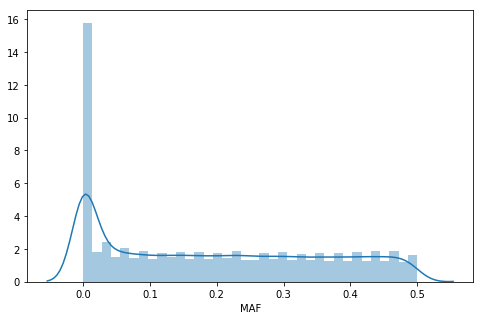

In [7]:
plt.figure(figsize=(8,5));
sns.distplot(df_freq.MAF, norm_hist=True, kde=True);
plt.savefig("figures/maf_distrib.png");

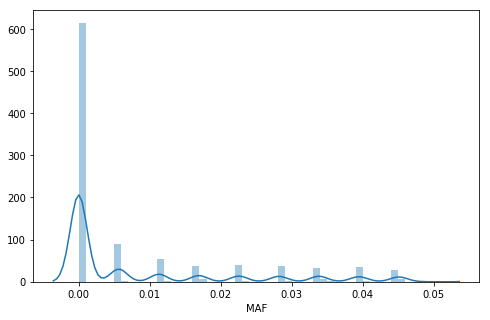

In [8]:
# Keep only the frequencies under 5%
df_freq_005 = df_freq[ df_freq.MAF <= 0.05 ]
df_freq_005.shape
plt.figure(figsize=(8,5));
sns.distplot(df_freq_005.MAF);
plt.savefig("figures/maf_distrib_005.png");

# Population stratification

See [this article](https://www.cog-genomics.org/plink2/strat). 

## plink --pca

By default `--pca` generates 10 principal components.

In [9]:
!plink2 --bfile hapmap1/hapmap1 --out hapmap1/pca --pca 

PLINK v2.00a2LM AVX2 Intel (31 Jul 2019)       www.cog-genomics.org/plink/2.0/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1/pca.log.
Options in effect:
  --bfile hapmap1/hapmap1
  --out hapmap1/pca
  --pca

Start time: Tue Aug  6 15:44:51 2019
7889 MiB RAM detected; reserving 3944 MiB for main workspace.
Using up to 4 compute threads.
89 samples (0 females, 89 males; 89 founders) loaded from hapmap1/hapmap1.fam.
83534 variants loaded from hapmap1/hapmap1.bim.
1 binary phenotype loaded (44 cases, 45 controls).
Calculating allele frequencies... 78done.
Constructing GRM: 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.
Correcting for missingness... 101112131414151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586

## Import dummy phenotypes

1 = Chinese, 2 = Japanese.

In [40]:
df_phe = pd.read_csv("hapmap1/pop.phe", sep="\s+", header=None)
df_phe[2].value_counts()

1    45
2    44
Name: 2, dtype: int64

## Visualization

We obtain eigenvectors for each individual (89 in total). We eventually want to plot clusters with a color code depending on the ethnicity.

### Eigenvalues



In [10]:
# Read the content of the file
with open("hapmap1/pca.eigenval", 'r') as file:
    content = file.read()
# Split the string into lists
eigval = content.split('\n')
# Remove empty item
eigval.pop()
# Convert strings into floats
eigval = [ float(val) for val in eigval ]
print(eigval)

[1.31082, 0.942592, 0.933744, 0.921205, 0.911502, 0.909852, 0.906222, 0.902498, 0.900286, 0.898584]


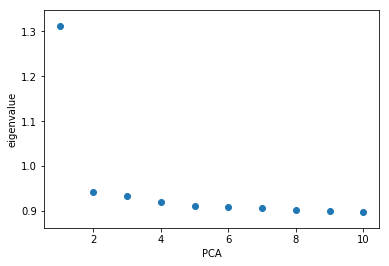

In [11]:
x = np.arange(1, 11)
plt.scatter(x, eigval);
plt.xlabel('PCA'); plt.ylabel('eigenvalue');

### Eigenvectors



In [38]:
# Import the eigenvectors into a DataFrame
df_pca = pd.read_csv("hapmap1/pca.eigenvec", sep="\s+")
# Add a column: real ethnicity
df_pca['ethnicity'] = df_phe[2]
# Display
print(df_pca.shape)
df_pca.head()

(89, 13)


,#FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,ethnicity
0,HCB181,1,0.111956,-0.058102,0.016041,-0.220066,0.036913,-0.233806,-0.288174,0.563183,-0.021931,-0.093440,1
1,HCB182,1,0.119658,-0.003527,-0.100068,-0.039176,0.076547,-0.081671,0.025727,0.174486,0.060108,0.177862,1
2,HCB183,1,0.110705,-0.026402,0.100365,-0.073164,0.154726,-0.002431,0.029012,-0.116640,-0.023803,-0.129813,1
3,HCB184,1,0.093028,0.046096,-0.055362,-0.120627,-0.097591,0.151477,0.143391,0.047492,0.042842,-0.059686,1
4,HCB185,1,0.105844,-0.084207,0.157605,-0.013441,0.033425,-0.006122,-0.174584,0.015990,0.072870,-0.001880,1


Compute the explained variance : $expl\_var_k = \frac {\lambda_k}{\sum \lambda_i }$

In [47]:
exp_var = []
eigval_sum = np.sum(eigval)
for lbda in eigval :
    exp_var.append(lbda / eigval_sum)

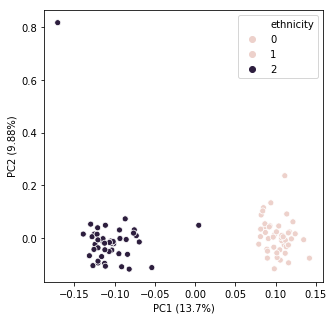

In [57]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='PC1', y='PC2', 
                data=df_pca, hue='ethnicity');
plt.xlabel('PC1 ({:.3}%)'.format(exp_var[0]*100))
plt.ylabel('PC2 ({:.3}%)'.format(exp_var[1]*100));

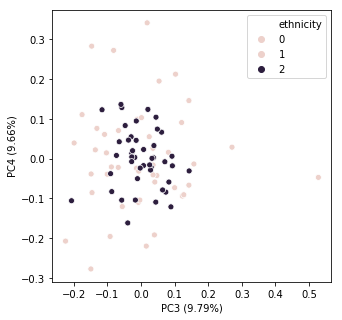

In [59]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='PC3', y='PC4', 
                data=df_pca, hue='ethnicity');
plt.xlabel('PC3 ({:.3}%)'.format(exp_var[2]*100))
plt.ylabel('PC4 ({:.3}%)'.format(exp_var[3]*100));